In [1]:
import pandas as pd #pandas库用于读取csv文件

In [2]:
%matplotlib inline
import numpy as np
import re

In [3]:
pip install jieba


The following command must be run outside of the IPython shell:

    $ pip install jieba

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import jieba.posseg as psg
import jieba

In [5]:
result = pd.read_csv('result_高等数学.csv').astype(str)
result

,content,id,content_type,agreeCount,mark
0,完全把课件照着念，,1,pos,66,3
1,没有我想象中的通俗易懂 就是有点照着课件将 让人不是很理解,2,neg,29,2
2,很好的教学团队， 很负责人的教学过程！,3,pos,23,5
3,讲中值定理那个老师，我去，她连中值定理都没介绍，就开始做题，根本听不懂系列,4,pos,17,3
4,讲解性有待提高，感觉像在念课本,5,pos,14,4
...,...,...,...,...,...
204,。。还是听不懂啊 只是在念书本而已,205,neg,0,2
205,谁高等数学厉害，教教我，网上授课，加我QQ481271976,206,pos,0,4
206,传说中的PPT老师,207,neg,0,1
207,教学进度与内容安排的表格不完整，只能看到一半,208,pos,0,3


In [6]:
result[['content','content_type']].duplicated().sum()
result = result[['content','content_type']].drop_duplicates()
result

,content,content_type
0,完全把课件照着念，,pos
1,没有我想象中的通俗易懂 就是有点照着课件将 让人不是很理解,neg
2,很好的教学团队， 很负责人的教学过程！,pos
3,讲中值定理那个老师，我去，她连中值定理都没介绍，就开始做题，根本听不懂系列,pos
4,讲解性有待提高，感觉像在念课本,pos
...,...,...
204,。。还是听不懂啊 只是在念书本而已,neg
205,谁高等数学厉害，教教我，网上授课，加我QQ481271976,pos
206,传说中的PPT老师,neg
207,教学进度与内容安排的表格不完整，只能看到一半,pos


In [7]:
result = result[['content','content_type']].drop_duplicates()
result

,content,content_type
0,完全把课件照着念，,pos
1,没有我想象中的通俗易懂 就是有点照着课件将 让人不是很理解,neg
2,很好的教学团队， 很负责人的教学过程！,pos
3,讲中值定理那个老师，我去，她连中值定理都没介绍，就开始做题，根本听不懂系列,pos
4,讲解性有待提高，感觉像在念课本,pos
...,...,...
204,。。还是听不懂啊 只是在念书本而已,neg
205,谁高等数学厉害，教教我，网上授课，加我QQ481271976,pos
206,传说中的PPT老师,neg
207,教学进度与内容安排的表格不完整，只能看到一半,pos


In [8]:
result.reset_index(drop=True,inplace=True)

In [9]:
content = result['content']
pattern = re.compile('[a-zA-Z0-9]')
content = content.apply(lambda x : pattern.sub('',x))
content

0                                  完全把课件照着念，
1              没有我想象中的通俗易懂 就是有点照着课件将 让人不是很理解
2                        很好的教学团队， 很负责人的教学过程！
3      讲中值定理那个老师，我去，她连中值定理都没介绍，就开始做题，根本听不懂系列
4                            讲解性有待提高，感觉像在念课本
                       ...                  
194                        。。还是听不懂啊 只是在念书本而已
195                      谁高等数学厉害，教教我，网上授课，加我
196                                   传说中的老师
197                   教学进度与内容安排的表格不完整，只能看到一半
198                               可以呀！和书上差不多
Name: content, Length: 199, dtype: object

In [10]:
# 自定义简单的分词函数
worker = lambda s : [[x.word,x.flag] for x in psg.cut(s)]   # 单词与词性
seg_word = content.apply(worker)
seg_word

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\黄文颂\AppData\Local\Temp\jieba.cache
Loading model cost 0.390 seconds.
Prefix dict has been built successfully.


0      [[完全, ad], [把, p], [课件, n], [照着, v], [念, v], [...
1      [[没有, v], [我, r], [想象, n], [中, f], [的, uj], [通...
2      [[很好, a], [的, uj], [教学, n], [团队, n], [，, x], [...
3      [[讲, v], [中值, n], [定理, vn], [那个, r], [老师, n], ...
4      [[讲解, v], [性, n], [有待, v], [提高, v], [，, x], [感...
                             ...                        
194    [[。, x], [。, x], [还是, c], [听不懂, v], [啊, zg], [...
195    [[谁, r], [高等数学, l], [厉害, a], [，, x], [教教, n], ...
196                  [[传说, n], [中, f], [的, uj], [老师, n]]
197    [[教学进度, n], [与, p], [内容, n], [安排, v], [的, uj],...
198    [[可以, c], [呀, y], [！, x], [和, c], [书上, s], [差不...
Name: content, Length: 199, dtype: object

In [11]:
n_word = seg_word.apply(lambda x: len(x)) 
n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

index_content = [item for sublist in n_content for item in sublist] 
seg_word = [item for sublist in seg_word for item in sublist] 

word = [x[0] for x in seg_word]
nature = [x[1] for x in seg_word]
# content_type评论类型
content_type = [[x]*y for x,y in zip(list(result['content_type']),list(n_word))]
content_type = [item for sublist in content_type for item in sublist] 

# 构造数据框
df = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature,
                      'content_type' : content_type})
df

,index_content,word,nature,content_type
0,1,完全,ad,pos
1,1,把,p,pos
2,1,课件,n,pos
3,1,照着,v,pos
4,1,念,v,pos
...,...,...,...,...
1746,199,呀,y,pos
1747,199,！,x,pos
1748,199,和,c,pos
1749,199,书上,s,pos


In [12]:
# 删除标点符号
df = df[df['nature'] != 'x']
df

,index_content,word,nature,content_type
0,1,完全,ad,pos
1,1,把,p,pos
2,1,课件,n,pos
3,1,照着,v,pos
4,1,念,v,pos
...,...,...,...,...
1745,199,可以,c,pos
1746,199,呀,y,pos
1748,199,和,c,pos
1749,199,书上,s,pos


In [13]:
#路径下加载总停用词表stoplist.txt
stop_path = open('stoplist.txt','r',encoding='utf-8')
stop = [x.replace('\n','') for x in stop_path.readlines()]
# 得到非停用词序列
word = list(set(word) - set(stop))
# 判断表格中的单词列是否在非停用词列中
df = df[df['word'].isin(word)]
df

,index_content,word,nature,content_type
2,1,课件,n,pos
4,1,念,v,pos
8,2,想象,n,neg
9,2,中,f,neg
11,2,通俗易懂,l,neg
...,...,...,...,...
1738,198,表格,n,pos
1740,198,完整,a,pos
1742,198,只能,v,pos
1744,198,一半,m,pos


In [14]:
# 构造各词在评价中的位置列
n_word = list(df.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = [item for sublist in index_word for item in sublist]
df['index_word'] = index_word
df.reset_index(drop=True,inplace=True)
df

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index_content,word,nature,content_type,index_word
0,1,课件,n,pos,0
1,1,念,v,pos,1
2,2,想象,n,neg,0
3,2,中,f,neg,1
4,2,通俗易懂,l,neg,2
...,...,...,...,...,...
743,198,表格,n,pos,3
744,198,完整,a,pos,4
745,198,只能,v,pos,5
746,198,一半,m,pos,6


In [15]:
# 提取含名词的评论的句子id
ind = df[[x == 'n' for x in df['nature']]]['index_content'].unique()
# 提取评价
df = df[df['index_content'].isin(ind)]
# 重置索引
df.reset_index(drop=True,inplace=True)
df

,index_content,word,nature,content_type,index_word
0,1,课件,n,pos,0
1,1,念,v,pos,1
2,2,想象,n,neg,0
3,2,中,f,neg,1
4,2,通俗易懂,l,neg,2
...,...,...,...,...,...
630,198,安排,v,pos,2
631,198,表格,n,pos,3
632,198,完整,a,pos,4
633,198,只能,v,pos,5


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

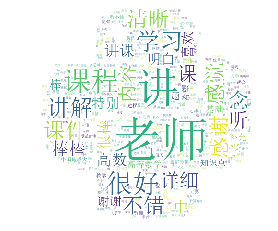

In [17]:
#按word分组统计数目
frequencies = df.groupby(by = ['word'])['word'].count()
# 按数目降序排序
frequencies = frequencies.sort_values(ascending = False)
# 从文件中将图像读取为数组
backgroud_Image=plt.imread('pl.jpeg')
wordcloud = WordCloud(font_path="simsun.ttc",
                      max_words=10000,            # 选择前10000词
                      background_color='white',  # 背景颜色为白色
                      mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
# 将数据展示到二维图像上
plt.imshow(my_wordcloud)
# 关掉x,y轴
plt.axis('off') 
plt.show()

In [18]:
df.to_csv("word.csv", index = False, encoding = 'utf-8')

In [19]:
word = pd.read_csv('word.csv',header=0)
#读入正负面情感评价词表
pos_comment = pd.read_csv("正面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_comment = pd.read_csv("负面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
pos_emotion = pd.read_csv("正面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_emotion = pd.read_csv("负面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')

#情感词和评价词的正负面词汇进行合并
positive = set(pos_comment.iloc[:,0])|set(pos_emotion.iloc[:,0])
negative = set(neg_comment.iloc[:,0])|set(neg_emotion.iloc[:,0])

#检索正负面表中相同的词并去除
intersection = positive & negative  
positive = list(positive - intersection)
negative = list(negative - intersection)

#赋予权重，正面词赋权1，负面词赋权-1
positive = pd.DataFrame({"word":positive,
                         "weight":[1]*len(positive)})
negative = pd.DataFrame({"word":negative,
                         "weight":[-1]*len(negative)})
posneg = positive.append(negative)

#将分词结果与正负面情感词表合并，定位情感词
data_posneg = pd.merge(left=word,right=posneg,on='word',how='left')
#先按评论id排序，再按在评论中的位置排序
data_posneg = data_posneg.sort_values(by = ['index_content','index_word'])
data_posneg.to_csv("data_posneg.csv", index = False, encoding = 'utf-8')

In [20]:
#加载否定词表
notdict = pd.read_csv("not.csv")

#构造新列，处理否定词
data_posneg['amend_weight'] = data_posneg['weight'] 
data_posneg['id'] = np.arange(0, len(data_posneg))

#只保留有情感值的词语
only_inclination = data_posneg.dropna()  

#修改索引
only_inclination.index = np.arange(0, len(only_inclination))
only_inclination

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,8,不好,d,pos,4,-1.0,-1.0,43
1,20,喜欢,v,pos,0,1.0,1.0,91
2,22,很慢,a,pos,2,-1.0,-1.0,99
3,24,感谢,v,pos,6,1.0,1.0,107
4,37,喜欢,v,pos,0,1.0,1.0,131
5,40,还行,v,pos,1,1.0,1.0,140
6,47,感谢,v,pos,24,1.0,1.0,171
7,47,辛苦,a,pos,25,1.0,1.0,172
8,66,太棒了,nr,pos,0,1.0,1.0,229
9,78,太棒了,nr,pos,9,1.0,1.0,252


In [21]:
import builtins
round = getattr(builtins, "round")

In [22]:
index = only_inclination['id']
for i in np.arange(0, len(only_inclination)):
    #提取第i个情感词所在的评论
    result = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]  
    #修改索引
    result.index = np.arange(0, len(result))
    #第i个情感值在该文档的位置
    affective = only_inclination['index_word'][i]  
    if affective == 1:
        #情感词前面的单词是否在否定词表
        ne = sum([i in notdict['term'] for i in result['word'][affective - 1]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]          
    elif affective > 1:
        #情感词前面两个位置的词语是否在否定词，存在一个调整成相反的情感权重，存在两个就不调整
        ne = sum([i in notdict['term'] for i in result['word'][[affective - 1, affective - 2]]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]

In [23]:
# 计算每条评论的情感值
emotional_value = only_inclination.groupby(['index_content'],as_index=False)['amend_weight'].sum()
# 去除情感值为0的评论
emotional_value = emotional_value[emotional_value['amend_weight'] != 0]
emotional_value.reset_index(drop=True,inplace=True)
emotional_value

,index_content,amend_weight
0,8,-1.0
1,20,1.0
2,22,-1.0
3,24,1.0
4,37,1.0
5,40,1.0
6,47,2.0
7,66,1.0
8,78,1.0
9,100,2.0


In [24]:
#给情感值大于0的赋予评论类型pos，小于0的赋予neg
emotional_value['a_type'] = ''
emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'
#查看情感分析的结果
df = pd.merge(left=word,right=emotional_value,on='index_content',how='right')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
#去重
df = df[['index_content','content_type', 'a_type']].drop_duplicates() 
df

,index_content,content_type,a_type
0,8,pos,neg
5,20,pos,pos
9,22,pos,neg
13,24,pos,pos
22,37,pos,pos
25,40,pos,pos
27,47,pos,pos
54,66,pos,pos
57,78,pos,pos
67,100,pos,pos


In [26]:
#混淆矩阵-交叉表
confusion_matrix = pd.crosstab(df['content_type'],df['a_type'],margins=True)
confusion_matrix

a_type,neg,pos,All
content_type,,,
pos,3,17,20
All,3,17,20


In [27]:
#提取正负面评论信息
#得到正面评论与负面评论对应的索引
ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
#得到正面评论与负面评论
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]

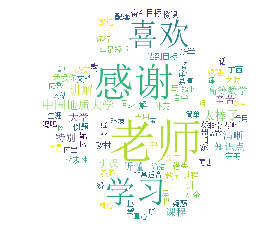

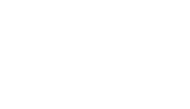

In [28]:
#绘制正面情感词云
#正面情感词词云
freq_pos = posdata.groupby(by = ['word'])['word'].count()
freq_pos = freq_pos.sort_values(ascending = False)
backgroud_Image=plt.imread('pl.jpeg')
wordcloud = WordCloud(font_path="simsun.ttc",
                      max_words=10000,
                      background_color='white',
                      mask=backgroud_Image)
pos_wordcloud = wordcloud.fit_words(freq_pos)
plt.imshow(pos_wordcloud)
plt.axis('off') 
plt.figure(figsize=(12, 7), dpi=20)
plt.axis("off")
plt.show()

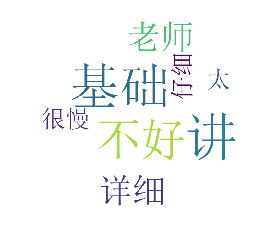

In [29]:
#绘制负面评论词云
freq_neg = negdata.groupby(by = ['word'])['word'].count()
freq_neg = freq_neg.sort_values(ascending = False)
neg_wordcloud = wordcloud.fit_words(freq_neg)
plt.imshow(neg_wordcloud)
plt.axis('off') 
plt.show()

In [30]:
#将结果写出,每条评论作为一行
posdata.to_csv("posdata.csv", index = False, encoding = 'utf-8')
negdata.to_csv("negdata.csv", index = False, encoding = 'utf-8')

In [31]:
import csv
import pandas as pd
list_set = []
with open("posdata.csv", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:                         #读取每一列数据
        for word in row:                       #读取每一个元素
            if '\u4e00' <= word <= '\u9fff':   #判断是否为中文字符串
#             print(word)
                list_set.append(word)          #元素添加到集合
    
from collections import Counter
words_count = Counter(list_set)
statics = words_count.most_common()[:50]   #得到词频排序前5名
print(statics)

[('老师', 10), ('感谢', 7), ('喜欢', 4), ('学习', 4), ('中国地质大学', 3), ('讲解', 3), ('太棒了', 3), ('讲课', 2), ('听懂', 2), ('高等数学', 2), ('大学', 2), ('中', 2), ('课程', 2), ('知识点', 2), ('辛苦', 2), ('讲', 2), ('清晰', 2), ('特别', 2), ('网站', 1), ('东西', 1), ('时', 1), ('终于', 1), ('呜呜', 1), ('上课', 1), ('形式', 1), ('感觉', 1), ('还行', 1), ('非常感谢', 1), ('优秀', 1), ('环境', 1), ('门', 1), ('生涯', 1), ('举足轻重', 1), ('过程', 1), ('例题', 1), ('很强', 1), ('代表性', 1), ('所学', 1), ('知识', 1), ('付出', 1), ('我爱你', 1), ('明', 1), ('简单', 1), ('易懂', 1), ('配套', 1), ('文档', 1), ('笔记', 1), ('习题', 1), ('高中', 1), ('奋斗目标', 1)]


In [32]:
import csv
import pandas as pd
list_set = []
with open("negdata.csv", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:                         #读取每一列数据
        for word in row:                       #读取每一个元素
            if '\u4e00' <= word <= '\u9fff':   #判断是否为中文字符串
#             print(word)
                list_set.append(word)          #元素添加到集合
    
from collections import Counter
words_count = Counter(list_set)
statics = words_count.most_common()[:50]   #得到词频排序前5名
print(statics)

[('讲', 2), ('基础', 2), ('不好', 2), ('太', 1), ('详细', 1), ('老师', 1), ('很慢', 1), ('仔细', 1)]
